<a href="https://colab.research.google.com/github/deepraj16/Face_mask_detection/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# face mask detection code for model transfer

In [1]:
!kaggle datasets download pranavsingaraju/facemask-detection-dataset-20000-images

Dataset URL: https://www.kaggle.com/datasets/pranavsingaraju/facemask-detection-dataset-20000-images
License(s): CC-BY-SA-4.0
facemask-detection-dataset-20000-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
import zipfile
zip_ref = zipfile.ZipFile('facemask-detection-dataset-20000-images.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [18]:
import os
import tensorflow
from tensorflow import keras
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt

In [4]:
categores = ['with_mask','without_mask']

/content/FMD_DATASET/with_mask/simple
simple3602.jpg


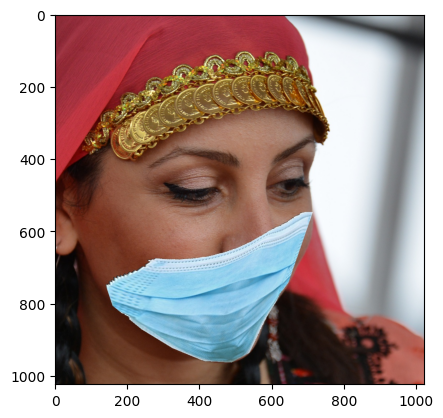

/content/FMD_DATASET/without_mask/simple
simple3602.jpg


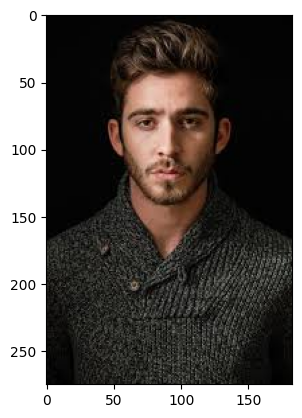

In [5]:
for categorey in categores :
    path=os.path.join('/content/FMD_DATASET/',categorey,'simple')
    print(path)
    for file in os.listdir(path):
        print(file)
        path1=os.path.join(path,file)
        k=plt.imread(path1)
        plt.imshow(k)
        plt.show()
        break

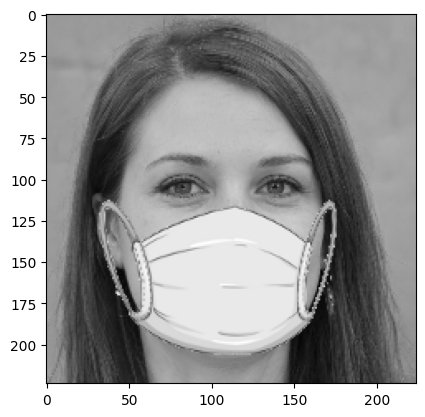

In [6]:
k=cv2.imread("/content/new_with_mask/with-mask-default-mask-seed0000.png")
plt.imshow(k)

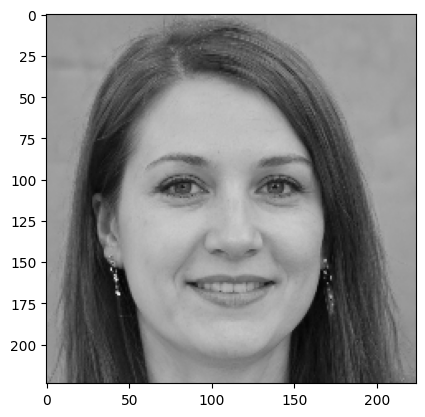

In [7]:
k=cv2.imread("/content/new_without_mask/seed0000.png")
plt.imshow(k)

In [9]:
data_with_mask=[]
path=os.path.join('/content/new_with_mask')
lable=1
for file in os.listdir(path):
    imge_path=os.path.join(path,file)
    image=cv2.imread(imge_path)
    if image.shape[0]<224 or image.shape[1]<224 :
        print(image.shape)
    else :
        image = cv2.resize(image,(224,224))
        data_with_mask.append([image,lable])

In [10]:
len(data_with_mask)

10000

In [15]:
data_without_mask=[]
path=os.path.join('/content/new_without_mask')
lable=0
for file in os.listdir(path):
    imge_path=os.path.join(path,file)
    image=cv2.imread(imge_path)
    if image.shape[0]<224 or image.shape[1]<224 :
        print(image.shape)
    else :
        image = cv2.resize(image,(224,224))
        data_without_mask.append([image,lable])

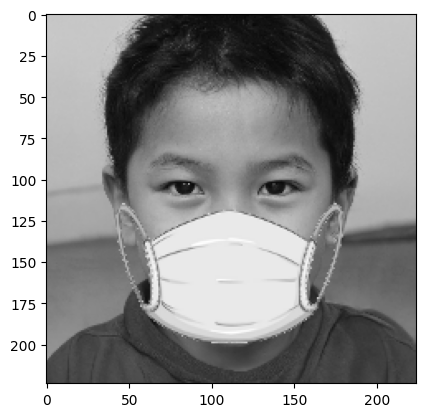

In [11]:
plt.imshow(data[16][0])

In [19]:
data=[]
for i in data_with_mask :
    data.append(i)
    if len(data)==1500 :
        break
for i in data_without_mask :
    data.append(i)
    if len(data)==3000 :
        break

In [20]:
import random
random.shuffle(data)

In [21]:
X=[]
y=[]

for featues , lable in data :
    X.append(featues)
    y.append(lable)

In [22]:
import numpy as np
X = np.array(X)
y=np.array(y)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)


In [24]:
from tensorflow import keras
from keras.preprocessing import image
from keras.applications import VGG16
vgg =VGG16()


In [25]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from keras import Sequential
model = Sequential()
for layer in vgg.layers[:-1] :
    model.add(layer)

In [27]:

for layer in model.layers :
    layer.trainable = False

In [28]:
from keras.layers import Dense
model.add(Dense(1,activation='sigmoid'))

In [29]:
model.compile(optimizer = 'Adam' , loss = 'binary_crossentropy' , metrics=['accuracy'])

In [30]:

model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 38s 310ms/step - accuracy: 0.9443 - loss: 0.1155 - val_accuracy: 1.0000 - val_loss: 2.3762e-05
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 223ms/step - accuracy: 1.0000 - loss: 7.7085e-05 - val_accuracy: 1.0000 - val_loss: 2.3110e-05
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 226ms/step - accuracy: 1.0000 - loss: 3.6638e-05 - val_accuracy: 1.0000 - val_loss: 2.2666e-05
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 230ms/step - accuracy: 1.0000 - loss: 2.7403e-05 - val_accuracy: 1.0000 - val_loss: 2.1759e-05
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 232ms/step - accuracy: 1.0000 - loss: 4.6438e-05 - val_accuracy: 1.0000 - val_loss: 2.1279e-05


In [31]:
# Save the entire model
model.save("cnn_model.h5")